# Tensorflow Practice

In [34]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

In [35]:
# check which tensorflow version
print(tf.__version__)

2.6.0


## Generate Data

In [36]:
observations = 1000

# generate xs and zs
xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(low=-10, high=10, size=(observations,1))

generated_inputs = np.column_stack((xs, zs))

noise = np.random.uniform(-1, 1, (observations,1))

# generated algorithm
generated_targets = 2*xs - 3*zs + 5 + noise

# save as numpy file since tensorflow prefers tensors as opposed to other files
np.savez("tf_intro", inputs=generated_inputs, targets=generated_targets)

In [37]:
training_data = np.load('tf_intro.npz')

In [38]:
training_data

## Solving with Tensorflow
**Build Model**

In [39]:
# input size is for each variable, xs and zs
# how many fields I'll use for my model
input_size = 2

# the prediction
output_size = 1

In [40]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(output_size) # same as outputs = np.dot(inputs,weights) + bias
                            ])

# add optimizer, sgd for stochastic gradient descent
# add L2 norm loss, aka least sum of squared errors
model.compile(optimizer='sgd', loss='mean_squared_error')


# now fit the model
# epoch = number of iterations
model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Epoch 1/100
32/32 - 0s - loss: 33.4268
Epoch 2/100
32/32 - 0s - loss: 4.4733
Epoch 3/100
32/32 - 0s - loss: 1.4747
Epoch 4/100
32/32 - 0s - loss: 0.6773
Epoch 5/100
32/32 - 0s - loss: 0.4379
Epoch 6/100
32/32 - 0s - loss: 0.3746
Epoch 7/100
32/32 - 0s - loss: 0.3551
Epoch 8/100
32/32 - 0s - loss: 0.3587
Epoch 9/100
32/32 - 0s - loss: 0.3535
Epoch 10/100
32/32 - 0s - loss: 0.3515
Epoch 11/100
32/32 - 0s - loss: 0.3526
Epoch 12/100
32/32 - 0s - loss: 0.3458
Epoch 13/100
32/32 - 0s - loss: 0.3626
Epoch 14/100
32/32 - 0s - loss: 0.3542
Epoch 15/100
32/32 - 0s - loss: 0.3490
Epoch 16/100
32/32 - 0s - loss: 0.3433
Epoch 17/100
32/32 - 0s - loss: 0.3492
Epoch 18/100
32/32 - 0s - loss: 0.3562
Epoch 19/100
32/32 - 0s - loss: 0.3498
Epoch 20/100
32/32 - 0s - loss: 0.3488
Epoch 21/100
32/32 - 0s - loss: 0.3476
Epoch 22/100
32/32 - 0s - loss: 0.3492
Epoch 23/100
32/32 - 0s - loss: 0.3535
Epoch 24/100
32/32 - 0s - loss: 0.3446
Epoch 25/100
32/32 - 0s - loss: 0.3548
Epoch 26/100
32/32 - 0s - loss: 0

## Extracts Weights and Bias

In [41]:
# print out weights and bias
model.layers[0].get_weights()

[array([[ 2.0155907],
        [-3.0031686]], dtype=float32), array([5.024773], dtype=float32)]

In [42]:
weights = model.layers[0].get_weights()[0]

weights

array([[ 2.0155907],
       [-3.0031686]], dtype=float32)

In [43]:
bias = model.layers[0].get_weights()[1]

bias

array([5.024773], dtype=float32)

## Extract the Outputs (Make Predictions)

In [44]:
# output values compared to target to evaluate loss function
# model's predictions
model.predict_on_batch(training_data['inputs']).round()

array([[ 36.],
       [ -3.],
       [ -3.],
       [-25.],
       [ 10.],
       [ 15.],
       [ 18.],
       [-26.],
       [-16.],
       [ 14.],
       [ -5.],
       [ -0.],
       [ 18.],
       [ 39.],
       [-25.],
       [ 19.],
       [-20.],
       [-26.],
       [  4.],
       [ 33.],
       [-17.],
       [ 24.],
       [ -2.],
       [-25.],
       [ 41.],
       [-11.],
       [ 40.],
       [-18.],
       [ 34.],
       [ 21.],
       [  5.],
       [ 22.],
       [ 31.],
       [  5.],
       [-19.],
       [ 18.],
       [ 12.],
       [-13.],
       [ 14.],
       [ 15.],
       [-12.],
       [ 14.],
       [ 41.],
       [ 16.],
       [ 10.],
       [ -3.],
       [ 16.],
       [ -9.],
       [-24.],
       [ 25.],
       [ 14.],
       [ 10.],
       [-28.],
       [ 40.],
       [ 28.],
       [ 14.],
       [-29.],
       [ 12.],
       [  4.],
       [-20.],
       [-34.],
       [ 10.],
       [  4.],
       [  2.],
       [-27.],
       [ 28.],
       [ 1

In [45]:
# compare manually
training_data['targets'].round()

array([[ 35.],
       [ -2.],
       [ -3.],
       [-24.],
       [ 10.],
       [ 15.],
       [ 18.],
       [-26.],
       [-16.],
       [ 14.],
       [ -5.],
       [ -1.],
       [ 18.],
       [ 39.],
       [-25.],
       [ 19.],
       [-21.],
       [-26.],
       [  3.],
       [ 34.],
       [-17.],
       [ 23.],
       [ -1.],
       [-24.],
       [ 40.],
       [-10.],
       [ 41.],
       [-18.],
       [ 34.],
       [ 22.],
       [  5.],
       [ 23.],
       [ 31.],
       [  5.],
       [-18.],
       [ 19.],
       [ 11.],
       [-13.],
       [ 14.],
       [ 15.],
       [-12.],
       [ 14.],
       [ 41.],
       [ 15.],
       [ 11.],
       [ -3.],
       [ 15.],
       [ -9.],
       [-24.],
       [ 25.],
       [ 13.],
       [ 10.],
       [-27.],
       [ 39.],
       [ 28.],
       [ 14.],
       [-30.],
       [ 11.],
       [  5.],
       [-21.],
       [-34.],
       [ 10.],
       [  4.],
       [  1.],
       [-27.],
       [ 28.],
       [ 1

## Plotting the Data

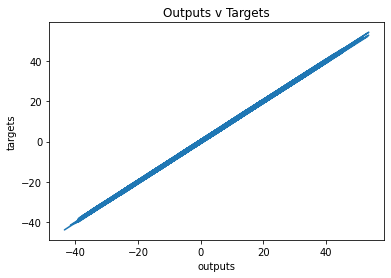

In [46]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.title('Outputs v Targets')
plt.show()

## Tuning Hyperparameters

In [47]:
# input size is for each variable, xs and zs

# how many fields I'll use for my model
input_size = 2

# the prediction
output_size = 1

# make our model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(output_size, # same as outputs = np.dot(inputs,weights) + bias
                                                   kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1), # assigning weights
                                                   bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1) # assigning bias
                                                   ), 
                            ])

# try out a custom optimizer
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)

# add optimizer, sgd for stochastic gradient descent
# add L2 norm loss, aka least sum of squared errors
model.compile(optimizer=custom_optimizer, loss='mean_squared_error')


# now fit the model
# epoch = number of iterations
model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Epoch 1/100
32/32 - 0s - loss: 25.8781
Epoch 2/100
32/32 - 0s - loss: 1.1108
Epoch 3/100
32/32 - 0s - loss: 0.4816
Epoch 4/100
32/32 - 0s - loss: 0.3863
Epoch 5/100
32/32 - 0s - loss: 0.4074
Epoch 6/100
32/32 - 0s - loss: 0.3649
Epoch 7/100
32/32 - 0s - loss: 0.3949
Epoch 8/100
32/32 - 0s - loss: 0.3979
Epoch 9/100
32/32 - 0s - loss: 0.3769
Epoch 10/100
32/32 - 0s - loss: 0.3880
Epoch 11/100
32/32 - 0s - loss: 0.3837
Epoch 12/100
32/32 - 0s - loss: 0.3825
Epoch 13/100
32/32 - 0s - loss: 0.3601
Epoch 14/100
32/32 - 0s - loss: 0.3769
Epoch 15/100
32/32 - 0s - loss: 0.3888
Epoch 16/100
32/32 - 0s - loss: 0.3770
Epoch 17/100
32/32 - 0s - loss: 0.3739
Epoch 18/100
32/32 - 0s - loss: 0.3941
Epoch 19/100
32/32 - 0s - loss: 0.3953
Epoch 20/100
32/32 - 0s - loss: 0.4010
Epoch 21/100
32/32 - 0s - loss: 0.4001
Epoch 22/100
32/32 - 0s - loss: 0.4024
Epoch 23/100
32/32 - 0s - loss: 0.3947
Epoch 24/100
32/32 - 0s - loss: 0.3729
Epoch 25/100
32/32 - 0s - loss: 0.3750
Epoch 26/100
32/32 - 0s - loss: 0

In [48]:
weights = model.layers[0].get_weights()[0]

bias = model.layers[0].get_weights()[1]

print('Weights are:\n', weights)
print('Bias is:\n', bias)

Weights are:
 [[ 2.0192015]
 [-3.0053446]]
Bias is:
 [5.0165515]


In [49]:
# create a dataframe for targets v predicted
model_data = pd.DataFrame(model.predict_on_batch(training_data['inputs']).round(), columns=['predicted'])

In [50]:
model_data.head()

,predicted
0,36.0
1,-3.0
2,-3.0
3,-25.0
4,10.0


In [51]:
model_data['actual'] = pd.DataFrame(training_data['targets'].round())

In [52]:
model_data.head()

,predicted,actual
0,36.0,35.0
1,-3.0,-2.0
2,-3.0,-3.0
3,-25.0,-24.0
4,10.0,10.0


In [53]:
model_data.shape

(1000, 2)

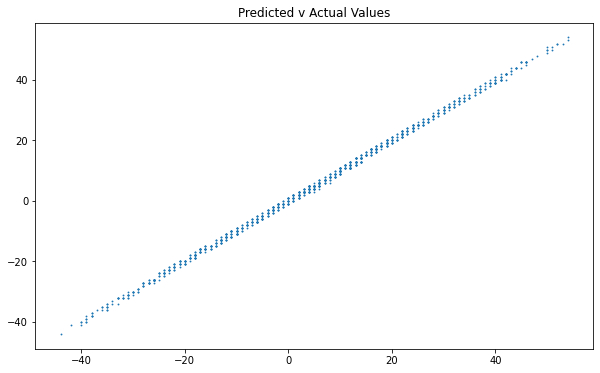

In [54]:
plt.figure(figsize=(10,6))
plt.scatter(x='predicted', y='actual', data=model_data, s=.7)
# plt.xlabel('predicted')
# plt.ylabel('actual')
plt.title('Predicted v Actual Values')
plt.show()

<Figure size 720x576 with 0 Axes>

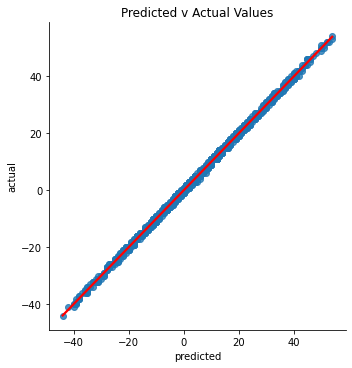

In [55]:
plt.figure(figsize=(10,8))
sns.lmplot(x='predicted', y='actual', data=model_data, line_kws={'color': 'red'})
# plt.xlabel('predicted')
# plt.ylabel('actual')
plt.title('Predicted v Actual Values')
plt.show();

## Practice

### 1. With 100,000 observations

In [56]:
# change number of observations to 100,000
observations = 100_000

# generate xs and zs
xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(low=-10, high=10, size=(observations,1))

generated_inputs = np.column_stack((xs, zs))

noise = np.random.uniform(-1, 1, (observations,1))

# generated algorithm
generated_targets = 2*xs - 3*zs + 5 + noise

# save as numpy file since tensorflow prefers tensors as opposed to other files
np.savez("tf_intro", inputs=generated_inputs, targets=generated_targets)

training_data = np.load('tf_intro.npz')

**Build Model**

In [ ]:
# input size is for each variable, xs and zs
# how many fields I'll use for my model
input_size = 2

# the prediction
output_size = 1


model = tf.keras.Sequential([
                             tf.keras.layers.Dense(output_size) # same as outputs = np.dot(inputs,weights) + bias
                            ])

# add optimizer, sgd for stochastic gradient descent
# add L2 norm loss, aka least sum of squared errors
model.compile(optimizer='sgd', loss='mean_squared_error')


# now fit the model
# epoch = number of iterations
model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Epoch 1/100
3125/3125 - 2s - loss: 0.7745
Epoch 2/100
3125/3125 - 2s - loss: 0.3450
Epoch 3/100
3125/3125 - 2s - loss: 0.3445
Epoch 4/100
3125/3125 - 2s - loss: 0.3453
Epoch 5/100
3125/3125 - 2s - loss: 0.3450
Epoch 6/100
3125/3125 - 2s - loss: 0.3452
Epoch 7/100
3125/3125 - 2s - loss: 0.3451
Epoch 8/100
3125/3125 - 2s - loss: 0.3450
Epoch 9/100
3125/3125 - 2s - loss: 0.3451
Epoch 10/100
3125/3125 - 2s - loss: 0.3460
Epoch 11/100
3125/3125 - 2s - loss: 0.3452
Epoch 12/100
3125/3125 - 2s - loss: 0.3452
Epoch 13/100
3125/3125 - 2s - loss: 0.3455
Epoch 14/100
3125/3125 - 2s - loss: 0.3450
Epoch 15/100
3125/3125 - 2s - loss: 0.3449
Epoch 16/100
3125/3125 - 2s - loss: 0.3448
Epoch 17/100
3125/3125 - 2s - loss: 0.3448
Epoch 18/100
3125/3125 - 2s - loss: 0.3453
Epoch 19/100
3125/3125 - 2s - loss: 0.3444
Epoch 20/100
3125/3125 - 2s - loss: 0.3447
Epoch 21/100
3125/3125 - 2s - loss: 0.3446
Epoch 22/100
3125/3125 - 2s - loss: 0.3452
Epoch 23/100
3125/3125 - 2s - loss: 0.3451
Epoch 24/100
3125/31

In [ ]:
model.layers[0].get_weights()

- Takeaway:
  - No difference in model performance aside from speed.
  - Model took about 3 minutes to train.

### 2. Play around with learning rate.

In [63]:
# change number of observations to 100,000
observations = 1000

# generate xs and zs
xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(low=-10, high=10, size=(observations,1))

generated_inputs = np.column_stack((xs, zs))

noise = np.random.uniform(-1, 1, (observations,1))

# generated algorithm
generated_targets = 2*xs - 3*zs + 5 + noise

# save as numpy file since tensorflow prefers tensors as opposed to other files
np.savez("tf_intro", inputs=generated_inputs, targets=generated_targets)

training_data = np.load('tf_intro.npz')

**Build Model**


`Learning_rate=1`

In [64]:
# input size is for each variable, xs and zs
# how many fields I'll use for my model
input_size = 2

# the prediction
output_size = 1


model1 = tf.keras.Sequential([
                             tf.keras.layers.Dense(output_size) # same as outputs = np.dot(inputs,weights) + bias
                            ])

# custom optimizer
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=1)

# add optimizer, sgd for stochastic gradient descent
# add L2 norm loss, aka least sum of squared errors
model1.compile(optimizer=custom_optimizer, loss='mean_squared_error')


# now fit the model
model1.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Epoch 1/100
32/32 - 0s - loss: nan
Epoch 2/100
32/32 - 0s - loss: nan
Epoch 3/100
32/32 - 0s - loss: nan
Epoch 4/100
32/32 - 0s - loss: nan
Epoch 5/100
32/32 - 0s - loss: nan
Epoch 6/100
32/32 - 0s - loss: nan
Epoch 7/100
32/32 - 0s - loss: nan
Epoch 8/100
32/32 - 0s - loss: nan
Epoch 9/100
32/32 - 0s - loss: nan
Epoch 10/100
32/32 - 0s - loss: nan
Epoch 11/100
32/32 - 0s - loss: nan
Epoch 12/100
32/32 - 0s - loss: nan
Epoch 13/100
32/32 - 0s - loss: nan
Epoch 14/100
32/32 - 0s - loss: nan
Epoch 15/100
32/32 - 0s - loss: nan
Epoch 16/100
32/32 - 0s - loss: nan
Epoch 17/100
32/32 - 0s - loss: nan
Epoch 18/100
32/32 - 0s - loss: nan
Epoch 19/100
32/32 - 0s - loss: nan
Epoch 20/100
32/32 - 0s - loss: nan
Epoch 21/100
32/32 - 0s - loss: nan
Epoch 22/100
32/32 - 0s - loss: nan
Epoch 23/100
32/32 - 0s - loss: nan
Epoch 24/100
32/32 - 0s - loss: nan
Epoch 25/100
32/32 - 0s - loss: nan
Epoch 26/100
32/32 - 0s - loss: nan
Epoch 27/100
32/32 - 0s - loss: nan
Epoch 28/100
32/32 - 0s - loss: nan
E

Takeaways:
- It exploded!

**Build Model**


`learning_rate=0.1`

In [65]:
# input size is for each variable, xs and zs
# how many fields I'll use for my model
input_size = 2

# the prediction
output_size = 1


model2 = tf.keras.Sequential([
                             tf.keras.layers.Dense(output_size) # same as outputs = np.dot(inputs,weights) + bias
                            ])

# custom optimizer
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)

# add optimizer, sgd for stochastic gradient descent
# add L2 norm loss, aka least sum of squared errors
model2.compile(optimizer=custom_optimizer, loss='mean_squared_error')


# now fit the model
model2.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Epoch 1/100
32/32 - 0s - loss: inf
Epoch 2/100
32/32 - 0s - loss: nan
Epoch 3/100
32/32 - 0s - loss: nan
Epoch 4/100
32/32 - 0s - loss: nan
Epoch 5/100
32/32 - 0s - loss: nan
Epoch 6/100
32/32 - 0s - loss: nan
Epoch 7/100
32/32 - 0s - loss: nan
Epoch 8/100
32/32 - 0s - loss: nan
Epoch 9/100
32/32 - 0s - loss: nan
Epoch 10/100
32/32 - 0s - loss: nan
Epoch 11/100
32/32 - 0s - loss: nan
Epoch 12/100
32/32 - 0s - loss: nan
Epoch 13/100
32/32 - 0s - loss: nan
Epoch 14/100
32/32 - 0s - loss: nan
Epoch 15/100
32/32 - 0s - loss: nan
Epoch 16/100
32/32 - 0s - loss: nan
Epoch 17/100
32/32 - 0s - loss: nan
Epoch 18/100
32/32 - 0s - loss: nan
Epoch 19/100
32/32 - 0s - loss: nan
Epoch 20/100
32/32 - 0s - loss: nan
Epoch 21/100
32/32 - 0s - loss: nan
Epoch 22/100
32/32 - 0s - loss: nan
Epoch 23/100
32/32 - 0s - loss: nan
Epoch 24/100
32/32 - 0s - loss: nan
Epoch 25/100
32/32 - 0s - loss: nan
Epoch 26/100
32/32 - 0s - loss: nan
Epoch 27/100
32/32 - 0s - loss: nan
Epoch 28/100
32/32 - 0s - loss: nan
E

Takeaways:
- Learning rate still not low enough, model still exploded!

**Build Model**

`learning_rate=0.0001`

In [66]:
# input size is for each variable, xs and zs
# how many fields I'll use for my model
input_size = 2

# the prediction
output_size = 1


model3 = tf.keras.Sequential([
                             tf.keras.layers.Dense(output_size) # same as outputs = np.dot(inputs,weights) + bias
                            ])

# custom optimizer
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.0001)

# add optimizer, sgd for stochastic gradient descent
# add L2 norm loss, aka least sum of squared errors
model3.compile(optimizer=custom_optimizer, loss='mean_squared_error')


# now fit the model
model3.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Epoch 1/100
32/32 - 0s - loss: 750.8546
Epoch 2/100
32/32 - 0s - loss: 486.4247
Epoch 3/100
32/32 - 0s - loss: 319.7522
Epoch 4/100
32/32 - 0s - loss: 213.6648
Epoch 5/100
32/32 - 0s - loss: 144.9157
Epoch 6/100
32/32 - 0s - loss: 100.5826
Epoch 7/100
32/32 - 0s - loss: 72.7514
Epoch 8/100
32/32 - 0s - loss: 54.5887
Epoch 9/100
32/32 - 0s - loss: 43.2860
Epoch 10/100
32/32 - 0s - loss: 35.8243
Epoch 11/100
32/32 - 0s - loss: 30.9479
Epoch 12/100
32/32 - 0s - loss: 27.6665
Epoch 13/100
32/32 - 0s - loss: 25.4298
Epoch 14/100
32/32 - 0s - loss: 23.9586
Epoch 15/100
32/32 - 0s - loss: 22.9603
Epoch 16/100
32/32 - 0s - loss: 22.1833
Epoch 17/100
32/32 - 0s - loss: 21.5884
Epoch 18/100
32/32 - 0s - loss: 21.1166
Epoch 19/100
32/32 - 0s - loss: 20.7024
Epoch 20/100
32/32 - 0s - loss: 20.3634
Epoch 21/100
32/32 - 0s - loss: 20.0717
Epoch 22/100
32/32 - 0s - loss: 19.7880
Epoch 23/100
32/32 - 0s - loss: 19.5212
Epoch 24/100
32/32 - 0s - loss: 19.2632
Epoch 25/100
32/32 - 0s - loss: 19.0151
Epo